# Projeto Módulo 4 - Renda Familiar

_____

A Autoridade De Estatística das Filipinas (PSA) lidera a realização da Pesquisa de Renda e Despesa Familiar (FIES) em todo o país. A pesquisa, realizada a cada 3 (três) anos, tem como objetivo fornecer dados sobre renda e despesas familiares, incluindo, entre outros, níveis de consumo por item de despesa, fontes de renda em dinheiro e informações relacionadas que afetam a renda e níveis de despesas e padrões nas Filipinas. Dessa forma, pede-se que seja elaborado um relatório prévio com insights e análise de dados por parte de um cientista de dados.
____________

In [1]:
# importando módulos

# tratamento de dados
import pandas as pd
import numpy as np

# gráficos
import matplotlib.pyplot as plt

# statsmodels (regressão)
import statsmodels.api as sm

# sklearn (separação de datasets treino e teste)
from sklearn.model_selection import train_test_split

In [23]:
# importando dados

df = pd.read_csv('family_income_expenditure.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


**Milestone 1 - Amostra e Descrição**

1 - Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.

2 - Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.

_____________

#### Cálculo do tamanho mínimo da amostra

In [44]:
erro_maximo = 500
z = 1.96
N = df.shape[0]
desvio = df["Medical Care Expenditure"].std()
erro = erro_maximo/desvio

print('Erro =', erro)
print('Z =', z)
print('N =', N)
print('Desvio padrão =', desvio)

Erro = 0.018585977166159326
Z = 1.96
N = 41544
Desvio padrão = 26902.002274617116


In [45]:
tam_amostra = np.ceil(((z * desvio)/ erro_maximo)**2)

print('Tamanho da Amostra =', tam_amostra)

Tamanho da Amostra = 11121.0


#### Selecionando amostra aleatória

In [46]:
df_amostra = df.sample(np.int(tam_amostra))

df_amostra.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
20127,61235,ARMM,50838,Wage/Salaries,0,20309,14983,2630,8648,1970,...,0,0,0,0,0,2,0,0,0,0
14617,162074,VI - Western Visayas,68202,Wage/Salaries,0,23488,19850,8755,10840,2220,...,0,0,0,0,0,0,0,0,0,0
4639,278665,X - Northern Mindanao,59025,Enterpreneurial Activities,0,13972,12110,7663,6584,975,...,1,1,0,1,0,0,0,0,0,0
24919,365067,VIII - Eastern Visayas,68068,Wage/Salaries,0,20836,11355,6429,6276,1365,...,1,0,0,0,0,2,1,1,0,0
29511,132200,IVA - CALABARZON,68415,Wage/Salaries,0,18714,12480,12614,5824,648,...,0,0,0,0,0,2,0,0,0,0


#### Análise descritiva dos dados

In [47]:
analise_descritiva_amostra = df_amostra._get_numeric_data().describe()
analise_descritiva_amostra

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,1.112100e+04,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,...,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000
mean,2.471816e+05,85014.970596,0.424512,25032.678446,18183.329916,10546.439888,10517.247370,2560.614873,5014.862962,15408.318856,...,0.398795,0.326769,0.131733,0.083536,0.061415,1.914037,0.319486,0.137937,0.013218,0.290711
std,2.713636e+05,51921.494694,0.673688,13310.652769,11805.361019,10683.837218,7737.866069,3701.324054,3402.193866,22487.022650,...,0.542969,0.480980,0.448821,0.354493,0.282438,1.565472,0.733074,0.355634,0.126895,0.564948
min,1.128500e+04,3704.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.049010e+05,50915.000000,0.000000,16387.000000,10996.000000,3384.000000,5493.000000,1010.000000,2873.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.646270e+05,73360.000000,0.000000,23282.000000,16600.000000,7310.000000,8714.000000,1805.000000,4316.000000,7390.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.919300e+05,105387.000000,1.000000,31220.000000,23952.000000,14251.000000,13396.000000,3104.000000,6314.000000,20280.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,6.042860e+06,729606.000000,2.000000,437467.000000,429640.000000,261566.000000,96284.000000,273769.000000,74800.000000,381806.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,2.000000,3.000000,5.000000


**Milestone 2 - Inferência Estatística**

1 - Utilizando um nível de confiança de 95%, calcule o intervalo de confiança pra média do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).

2 - Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.

3 - Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).

______________

In [105]:
from scipy.stats import norm, ttest_ind

1 - Utilizando um nível de confiança de 95%, calcule o intervalo de confiança pra média do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).

In [75]:
media_amt = np.mean(df_amostra["Medical Care Expenditure"])
conf = 0.95
signif = 1-conf
desvio_pad = np.std(df["Medical Care Expenditure"])
se_4 = desvio_pad/np.sqrt(tam_amostra)

ic_medical = norm.interval(conf, loc = media_amt, scale = se_4)

print('Intervalo de confiança pra média do dinheiro gasto com saúde: ', ic_medical)

media_amt = np.mean(df_amostra["Education Expenditure"])
conf = 0.95
signif = 1-conf
desvio_pad = np.std(df["Education Expenditure"])
se_4 = desvio_pad/np.sqrt(tam_amostra)

ic_education = norm.interval(conf, loc = media_amt, scale = se_4)

print('Intervalo de confiança pra média do dinheiro gasto com educação: ', ic_education)

Intervalo de confiança pra média do dinheiro gasto com saúde:  (6505.629986471432, 7505.596701776028)
Intervalo de confiança pra média do dinheiro gasto com educação:  (6944.400668572607, 7733.13246693679)


2 - Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.

#### $H_0$:  Diferença de média de número total de membros da família pelo sexo do chefe de família $= 0$
#### $H_1$ : Diferença de média de número total de membros da família pelo sexo do chefe de família $\neq 0$

In [108]:
a = np.array(df_amostra[df_amostra["Household Head Sex"] == 'Male']["Total Number of Family members"])
b = np.array(df_amostra[df_amostra["Household Head Sex"] == 'Female']["Total Number of Family members"])

pvalue = ttest_ind(a, b)[1]

In [110]:
sig = 1 - 0.95
pvalue < sig

True

#### Como o valor de p é menor do que o nível de significância de 0.05, podemos rejeitar a hipótese nula. Logo, há diferença entre a média de número total de membros da família pelo sexo do chefe de família.

3 - Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).

In [111]:
df_amostra.groupby(['Main Source of Income'])['Total Household Income'].mean()

Main Source of Income
Enterpreneurial Activities    214977.558760
Other sources of Income       233729.696052
Wage/Salaries                 271004.063783
Name: Total Household Income, dtype: float64

#### $H_0$:  Diferença de média total de renda da família de acordo com a fonte salarial $= 0$
#### $H_1$ : Diferença de média total de renda da família de acordo com a fonte salarial $\neq 0$

Como temos três fontes salariais no dataset, $H_0$ assume que selecnionando-se qualquer par de fontes salariais a diferença de médias será nula.

In [113]:
a = np.array(df_amostra[df_amostra["Main Source of Income"] == 'Enterpreneurial Activities']["Total Household Income"])
b = np.array(df_amostra[df_amostra["Main Source of Income"] == 'Wage/Salaries']["Total Household Income"])
c = np.array(df_amostra[df_amostra["Main Source of Income"] == 'Other sources of Income']["Total Household Income"])

pvalue_ab = ttest_ind(a, b)[1]
pvalue_bc = ttest_ind(b, c)[1]
pvalue_ca = ttest_ind(c, a)[1]

sig = 1 - 0.95

In [114]:
pvalue_ab < sig

True

In [115]:
pvalue_bc < sig

True

In [116]:
pvalue_ca < sig

True

#### Como nos três testes o valor de p é menor do que o nível de significância de 0.05, podemos rejeitar a hipótese nula. Logo, há diferença entre a média da renda familiar de acordo com a fonte de renda.

**Milestone 3 - Previsão de Renda Com Regressão Linear**

Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.


_____________

In [29]:
# geração de datasets de treino e teste (30%)
train, test = train_test_split(df, test_size = 0.3, random_state = 1)

# variável dependente (y): Total Household Income - é o que queremos prever
# variáveis independentes (x): demais variáveis - é o que queremos usar para prever renda
y_train = train['Total Household Income']
x_train = train.iloc[:, 1:]

# trabalhar apenas com variáveis independentes quantitativas
for c in x_train.columns:
    if x_train[c].dtype == 'O': # se for string,
        del x_train[c]          # não utilizar variável

# adicionar linha de constante para regressão linear ("intercepto", ou A na equação y = A + B1x1 + B2X2 + ... + erro).
# no statsmodels, essa linha de constante não vem por padrão.
x2_train = sm.add_constant(x_train)

# construção do modelo e output
model = sm.OLS(y_train, x2_train).fit()
print(model.summary())

# abaixo estão os resultados do treinamento do modelo.
#
# o R2 está bem alto (R-squared = 0.805 ou 80.5%), ou seja, o modelo explica 80.5% da variância.
# além disso, o teste F (F-statistic) indica que há pelo menos 01 variável independente com alta significância estatística.
# 
# existem algumas variáveis independentes com pouca significância para o modelo, sendo algumas delas:
# Bread and Cereals Expenditure  
# Meat Expenditure  
# Fruit Expenditure
# Members with age 5 - 17 years old
# House Age
# ...
# 
# estas variáveis, entre outras, possuem P>|t| acima de 5%, indicando que elas podem, no fundo, ter coeficiente == 0.

                              OLS Regression Results                              
Dep. Variable:     Total Household Income   R-squared:                       0.805
Model:                                OLS   Adj. R-squared:                  0.805
Method:                     Least Squares   F-statistic:                     2728.
Date:                    Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                            22:01:14   Log-Likelihood:            -3.8274e+05
No. Observations:                   29080   AIC:                         7.656e+05
Df Residuals:                       29035   BIC:                         7.660e+05
Df Model:                              44                                         
Covariance Type:                nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [30]:
# usando dataset de teste para testar o modelo.
# variáveis independentes (preditoras)
x_test = test.iloc[:, 1:]

# trabalhar apenas com variáveis independentes quantitativas
for c in x_test.columns:
    if x_test[c].dtype == 'O': # se for string,
        del x_test[c]          # não utilizar variável

# adicionar linha de constante para regressão linear ("intercepto", ou A na equação y = A + B1x1 + B2X2 + ... + erro).
# no statsmodels, essa linha de constante não vem por padrão.
x2_test = sm.add_constant(x_test)

# predição do modelo
model.predict(x2_test)

7896     121668.126797
25916    298654.858730
35805     78430.658110
25024     69853.497686
7035     111600.838284
             ...      
3303     271972.605214
40597     69185.862926
37678    531610.598243
27069     86245.556488
39196    675141.167613
Length: 12464, dtype: float64

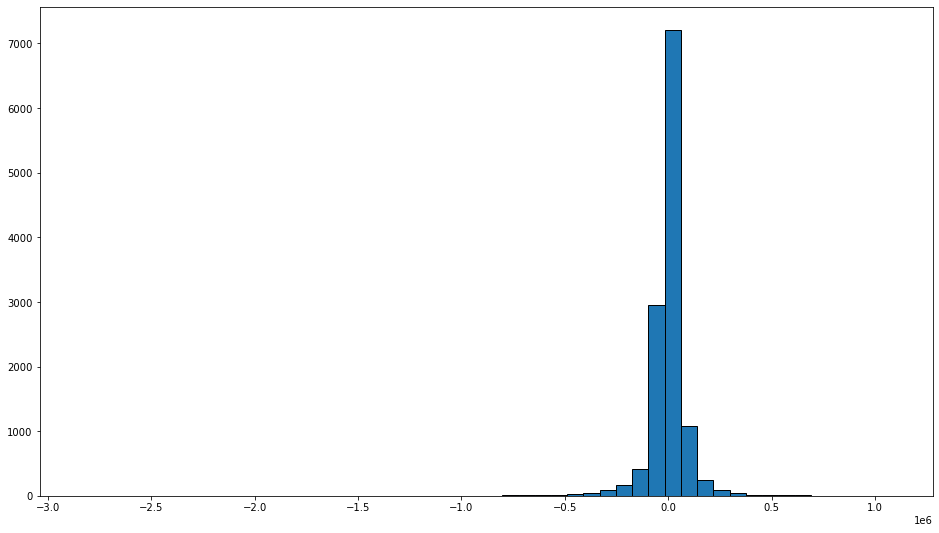

In [31]:
# usando dataset de teste para testar o modelo.
# variáveis independentes (preditoras)
x_test = test.iloc[:, 1:]
y_test = test['Total Household Income'] # variável dependente

# para saber como estão distribuídos os erros,
# podemos criar uma variável subtraindo o valor "real" do dataset teste do valor "previsto", também do dataset teste.
erro = model.predict(x2_test) - y_test

# e visualizar num histograma
plt.figure(figsize = (16, 9))
plt.hist(erro, bins = 50, edgecolor = 'black');

# assim podemos perceber que nossos erros estão centrados no zero e, portanto, podemos dizer que há um bom modelo regressivo.